In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
# 신호 데이터 수집 및 전처리
# 다양한 신호 데이터 수집 (예: 센서 데이터, IoT 데이터 등)


# ECG 데이터셋 불러오기
ecg_data = pd.read_csv('dataset\ECG dataset\ecg.csv')

In [7]:
print(ecg_data)

      -0.11252183  -2.8272038  -3.7738969  -4.3497511  -4.376041  -3.4749863  \
0       -1.100878   -3.996840   -4.285843   -4.506579  -4.022377   -3.234368   
1       -0.567088   -2.593450   -3.874230   -4.584095  -4.187449   -3.151462   
2        0.490473   -1.914407   -3.616364   -4.318823  -4.268016   -3.881110   
3        0.800232   -0.874252   -2.384761   -3.973292  -4.338224   -3.802422   
4       -1.507674   -3.574550   -4.478011   -4.408275  -3.321242   -2.105171   
...           ...         ...         ...         ...        ...         ...   
4992     0.608558   -0.335651   -0.990948   -1.784153  -2.626145   -2.957065   
4993    -2.060402   -2.860116   -3.405074   -3.748719  -3.513561   -3.006545   
4994    -1.122969   -2.252925   -2.867628   -3.358605  -3.167849   -2.638360   
4995    -0.547705   -1.889545   -2.839779   -3.457912  -3.929149   -3.966026   
4996    -1.351779   -2.209006   -2.520225   -3.061475  -3.065141   -3.030739   

      -2.1814082  -1.8182865  -1.250521

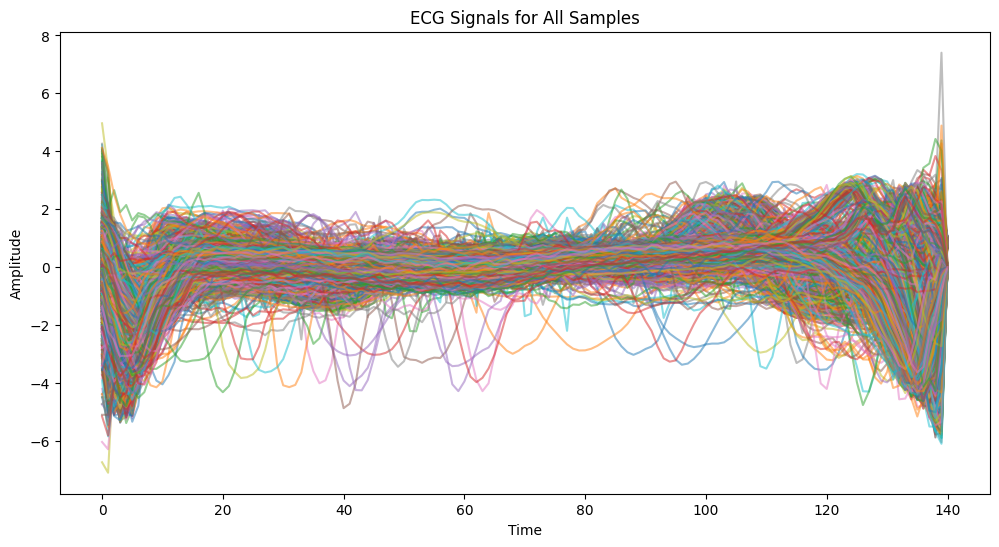

In [10]:
# 모든 샘플 시각화
plt.figure(figsize=(12, 6))

for i in range(len(ecg_data)):
    sample_data = ecg_data.iloc[i, :].values  # 마지막 열을 제외한 각 샘플 데이터
    plt.plot(sample_data, alpha=0.5)  # 투명도를 조절하여 겹치는 부분을 시각적으로 구분

plt.title('ECG Signals for All Samples')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

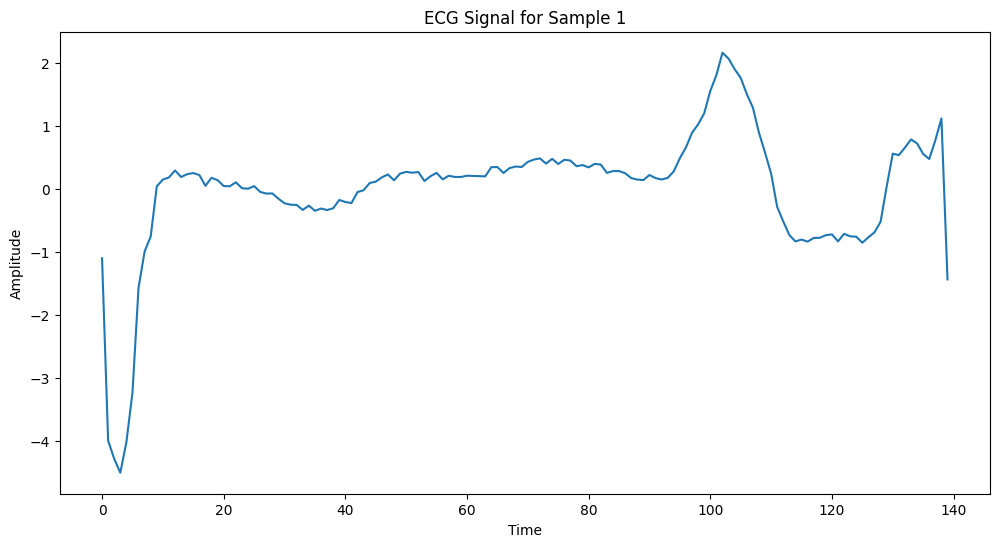

In [11]:
# 특정 샘플 선택 (예: 첫 번째 샘플)
sample_data = ecg_data.iloc[0, :-1].values  # 마지막 열을 제외한 첫 번째 샘플 데이터

# 샘플 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(sample_data)
plt.title('ECG Signal for Sample 1')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# 데이터 클렌징: 결측치 처리, 노이즈 제거, 이상치 탐지 및 제거
# 데이터 정규화 및 표준화
# 신호 데이터 품질 평가

# 품질 평가 지표 설정 (예: 신호 대 잡음비, 데이터 완전성, 이상치 비율 등)
# 평가 지표를 기준으로 데이터 품질 평가
# 신호 데이터 품질 관리

# 품질 향상을 위한 기법 적용 (예: 필터링, 평활화, 이상치 교정 등)
# 품질 관리 후 데이터 재평가
# 모델 학습 및 성능 평가



In [29]:
# 데이터셋 정보 확인
ecg_data.info()

# 데이터셋의 처음 몇 줄 확인
ecg_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Columns: 141 entries, -0.11252183 to 1.0
dtypes: float64(141)
memory usage: 5.4 MB


,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [12]:
# 결측치 확인
print(ecg_data.isnull().sum())

-0.11252183    0
-2.8272038     0
-3.7738969     0
-4.3497511     0
-4.376041      0
              ..
0.22807718     0
0.12343082     0
0.92528624     0
0.19313742     0
1.0            0
Length: 141, dtype: int64


# 품질 관리 전/후 데이터를 이용한 모델 학습 (머신러닝/딥러닝 모델)

In [13]:
# 특징과 레이블 분리
X = ecg_data.iloc[:, :-1].values  # 모든 행, 마지막 열을 제외한 모든 열
y = ecg_data.iloc[:, -1].values  # 모든 행, 마지막 열

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Random Forest 모델 정의
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# 상세한 평가 지표 출력
print(classification_report(y_test, y_pred))

Test Accuracy: 98.90%
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       410
         1.0       0.99      0.99      0.99       590

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
# 학습 모델 성능 평가 (예: 정확도, 정밀도, 재현율, F1 점수 등)
# 성능 비교 분석
# 결과 분석 및 보고서 작성

# 품질 관리 전후 모델 성능 비교 결과 분석
# 프로젝트 결과 정리 및 보고서 작성